In [35]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd 


In [36]:
dr = pd.date_range("2021-12-01 00","2022-03-31 00", freq='1d')  # Dec 1 2021 - Mar 31, 2022
dem = xr.open_dataset("/pscratch/sd/w/woodburn/er_deltat_fall22/aso_comparison/aso_files/upper_erw_dem_ll_0005regrid_reg.nc")

In [39]:
nldas = xr.open_dataset("/global/u1/r/rudisill/nldas_squire_compare/SQUIRE_PERIOD.NLDAS_snowfall_sum_map.h.txt_._regridll.nc")

/tmp/ipykernel_99571/3158380344.py:33: UserWarning: FixedFormatter should only be used together with FixedLocator
  ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)


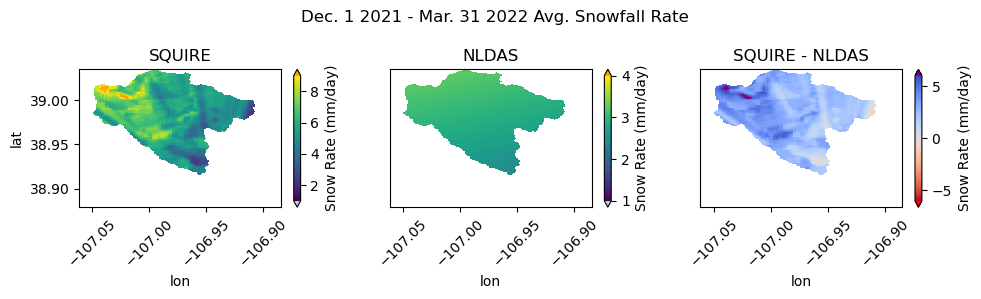

In [85]:
cmap_swe = plt.cm.viridis
cmap_swe.set_over(color='orange')
cmap_swe.set_under(color='lightblue')

cmap_swe_diff = plt.cm.coolwarm_r
cmap_swe_diff.set_over(color='purple')
cmap_swe_diff.set_under(color='red')




fig,ax = plt.subplots(1, 3, figsize=(10, 3))
dsr_squire = (ds.snow_rate_ws88diw.mean(dim='time') * 24).where(dem.Band1)
dsr_nldas  = (nldas.snowfall * 3600 / len(dr)).where(dem.Band1)

cb0=dsr_squire.plot(ax=ax[0], add_colorbar=False, cmap=cmap_swe, vmin=1, vmax=9)
cb1=dsr_nldas.plot(ax=ax[1],  add_colorbar=False, cmap=cmap_swe, vmin=1, vmax=4)
cb2=(dsr_squire - dsr_nldas).plot(ax=ax[2], add_colorbar=False, cmap=cmap_swe_diff, vmin=-6, vmax=6)

cb0=fig.colorbar(cb0, extend='both')
cb1=fig.colorbar(cb1, extend='both')
cb2=fig.colorbar(cb2, extend='both')

for cb in [cb0, cb1, cb2]:
    cb.set_label('Snow Rate (mm/day)')

for i in range(3):
#    ax[i].set_aspect('equal')
    ax[i].set_title('')
    if i > 0:
        ax[i].set_yticks([])    
        ax[i].set_ylabel('')    
    ax[i].set_xticklabels(ax[i].get_xticklabels(), rotation=45)


fig.suptitle("Dec. 1 2021 - Mar. 31 2022 Avg. Snowfall Rate")
ax[0].set_title("SQUIRE WS88")
ax[1].set_title("NLDAS")
ax[2].set_title("SQUIRE - NLDAS")
plt.tight_layout()
plt.savefig()

In [86]:
len(dr)

121